SVM-SMOTE (Support Vector Machine Synthetic Minority Over-sampling Technique) là một phương pháp oversampling trong xử lý dữ liệu mất cân bằng. Nó tạo ra các mẫu mới bằng cách nội suy giữa các mẫu của các vector hỗ trợ từ lớp thiểu số và các hàng xóm gần nhất của chúng.

Cách SVM-SMOTE hoạt động như sau:

Xây dựng một mô hình máy học SVM (Support Vector Machine) trên dữ liệu ban đầu.
Xác định các vector hỗ trợ (support vectors) từ lớp thiểu số. Đây là các mẫu quan trọng để xác định đường ranh giới giữa các lớp.
Tìm các hàng xóm gần nhất của các vector hỗ trợ từ lớp thiểu số.
Tạo ra các mẫu mới bằng cách nội suy giữa các vector hỗ trợ và các hàng xóm gần nhất của chúng. Quá trình này tạo ra các mẫu mới để cân bằng tỷ lệ giữa các lớp.
SVM-SMOTE tập trung vào việc tạo ra các mẫu mới từ các vector hỗ trợ của lớp thiểu số, những mẫu quan trọng để xác định đường ranh giới giữa các lớp. Bằng cách sử dụng các vector hỗ trợ và các hàng xóm gần nhất của chúng, SVM-SMOTE cung cấp các mẫu mới để tăng cường dữ liệu thiểu số và cải thiện khả năng phân loại cho các thuật toán máy học.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn import svm

from imblearn.over_sampling import SVMSMOTE

## Create data

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

We will create 2 classes, one majority one minority, clearly separated to facilitate the demonstration.

In [2]:
# Configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# transform arrays to pandas formats
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# create an imbalancced Xset
# (make blobs creates same number of obs per class
# we need to downsample manually)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

# display size
X.shape, y.shape

((1000, 2), (1000,))

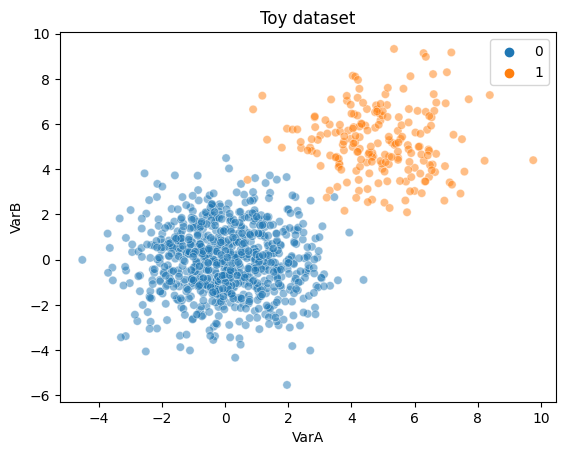

In [3]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

## Find the support vectors

In [5]:
# Initialize SVM classifier
clf = svm.SVC(kernel='linear')

# Fit data
clf = clf.fit(X, y)

# support vectors, indeces
clf.support_

array([ 20, 549, 588, 643, 674, 712, 826, 864, 882, 936, 943, 998])

In [6]:
# number of support vectors
len(clf.support_)

12

In [7]:
# the support vectors
clf.support_vectors_

array([[3.9304117 , 1.19939625],
       [2.70788065, 2.61122514],
       [1.94802214, 3.65449861],
       [1.63829752, 3.53940079],
       [1.41678999, 3.72752117],
       [3.45646523, 2.77001261],
       [3.31300139, 3.05683879],
       [0.71134556, 3.53158833],
       [3.21648338, 2.7459752 ],
       [3.55340038, 3.21885688],
       [3.77884315, 2.16341665],
       [1.32938201, 5.30783854]])

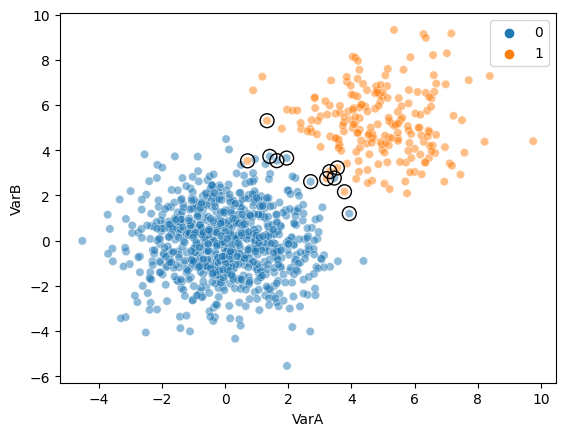

In [8]:
# mark the support vectors

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.scatter(clf.support_vectors_[:,0],
            clf.support_vectors_[:, 1],
            s=100,
            linewidth=1,
            facecolors='none',
            edgecolors='k')

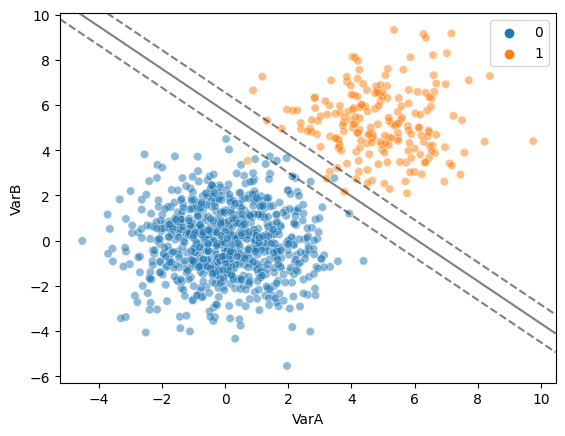

In [9]:
# plot the decision boundaries
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# add decision boundaries
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))

# decision_function
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], clf.coef_[0]) + clf.intercept_[0]
Z = Z.reshape(xx.shape)
    
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

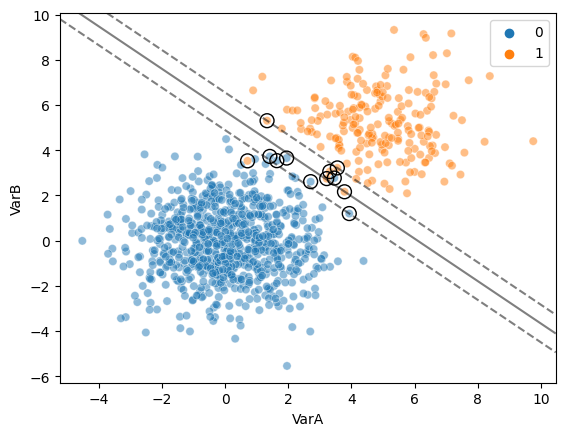

In [10]:
# now we plot the support vectors, whith lie at the and
# within the decision boundaries

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.scatter(clf.support_vectors_[:,0],
            clf.support_vectors_[:, 1],
            s=100,
            linewidth=1,
            facecolors='none',
            edgecolors='k')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# add decision boundaries
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))

# decision_function
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], clf.coef_[0]) + clf.intercept_[0]
Z = Z.reshape(xx.shape)
    
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

## SVM SMOTE

[SVMSMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SVMSMOTE.html)

In [11]:
sm = SVMSMOTE(
    sampling_strategy='auto',  # samples only the minority class
    random_state=0,  # for reproducibility
    k_neighbors=5, # neighbours to create the synthetic examples
    m_neighbors=10, # neighbours to determine if minority class is in "danger"
    n_jobs=4,
    svm_estimator = svm.SVC(kernel='linear')
)

# remember that the templates are those minority observations
# within the danger zone

# create the synthetic examples
X_res, y_res = sm.fit_resample(X, y)

c:\Users\cbnn7\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\over_sampling\_smote\filter.py:461: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [12]:
# size of original data

X.shape, y.shape

((1000, 2), (1000,))

In [13]:
# size of undersampled data

X_res.shape, y_res.shape

((1242, 2), (1242,))

In [14]:
# number of minority class observations

y.value_counts(), y_res.value_counts()

(0    800
 1    200
 dtype: int64,
 0    800
 1    442
 dtype: int64)

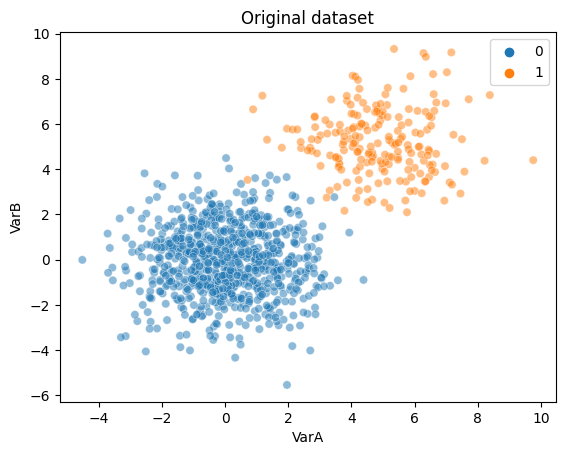

In [15]:
# plot of original data

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

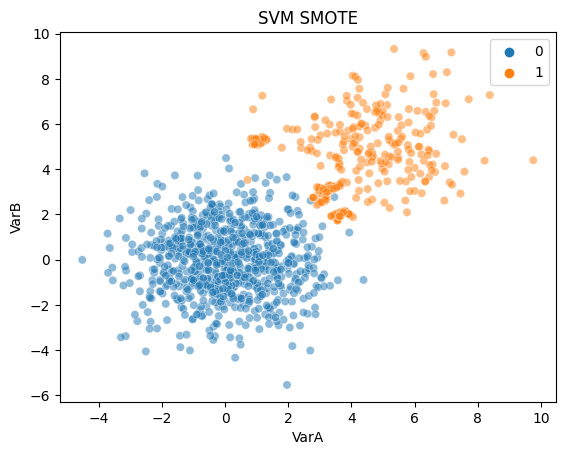

In [16]:


sns.scatterplot(
    data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
)

plt.title('SVM SMOTE')
plt.show()

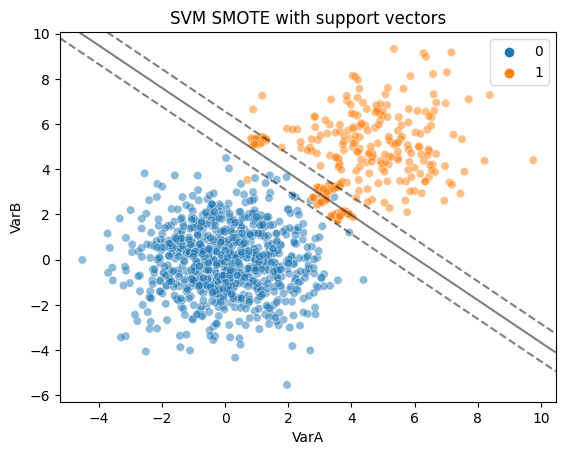

In [17]:


sns.scatterplot(
    data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# add decision boundaries
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))

# decision_function
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], clf.coef_[0]) + clf.intercept_[0]
Z = Z.reshape(xx.shape)
    
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

plt.title('SVM SMOTE with support vectors')
plt.show()